In [ ]:
import pandas as pd
import numpy as np

Project on Decision Tree and Random Forest

In [ ]:
from google.colab import files
data=files.upload()

Saving Social_Network_Ads(2).csv to Social_Network_Ads(2) (1).csv


In [ ]:
df=pd.read_csv('Social_Network_Ads(2).csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.drop(['Gender','User ID'],inplace=True,axis=1)

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [ ]:
x_train.shape

(320, 2)

In [ ]:
y_test.shape

(80,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dtc.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

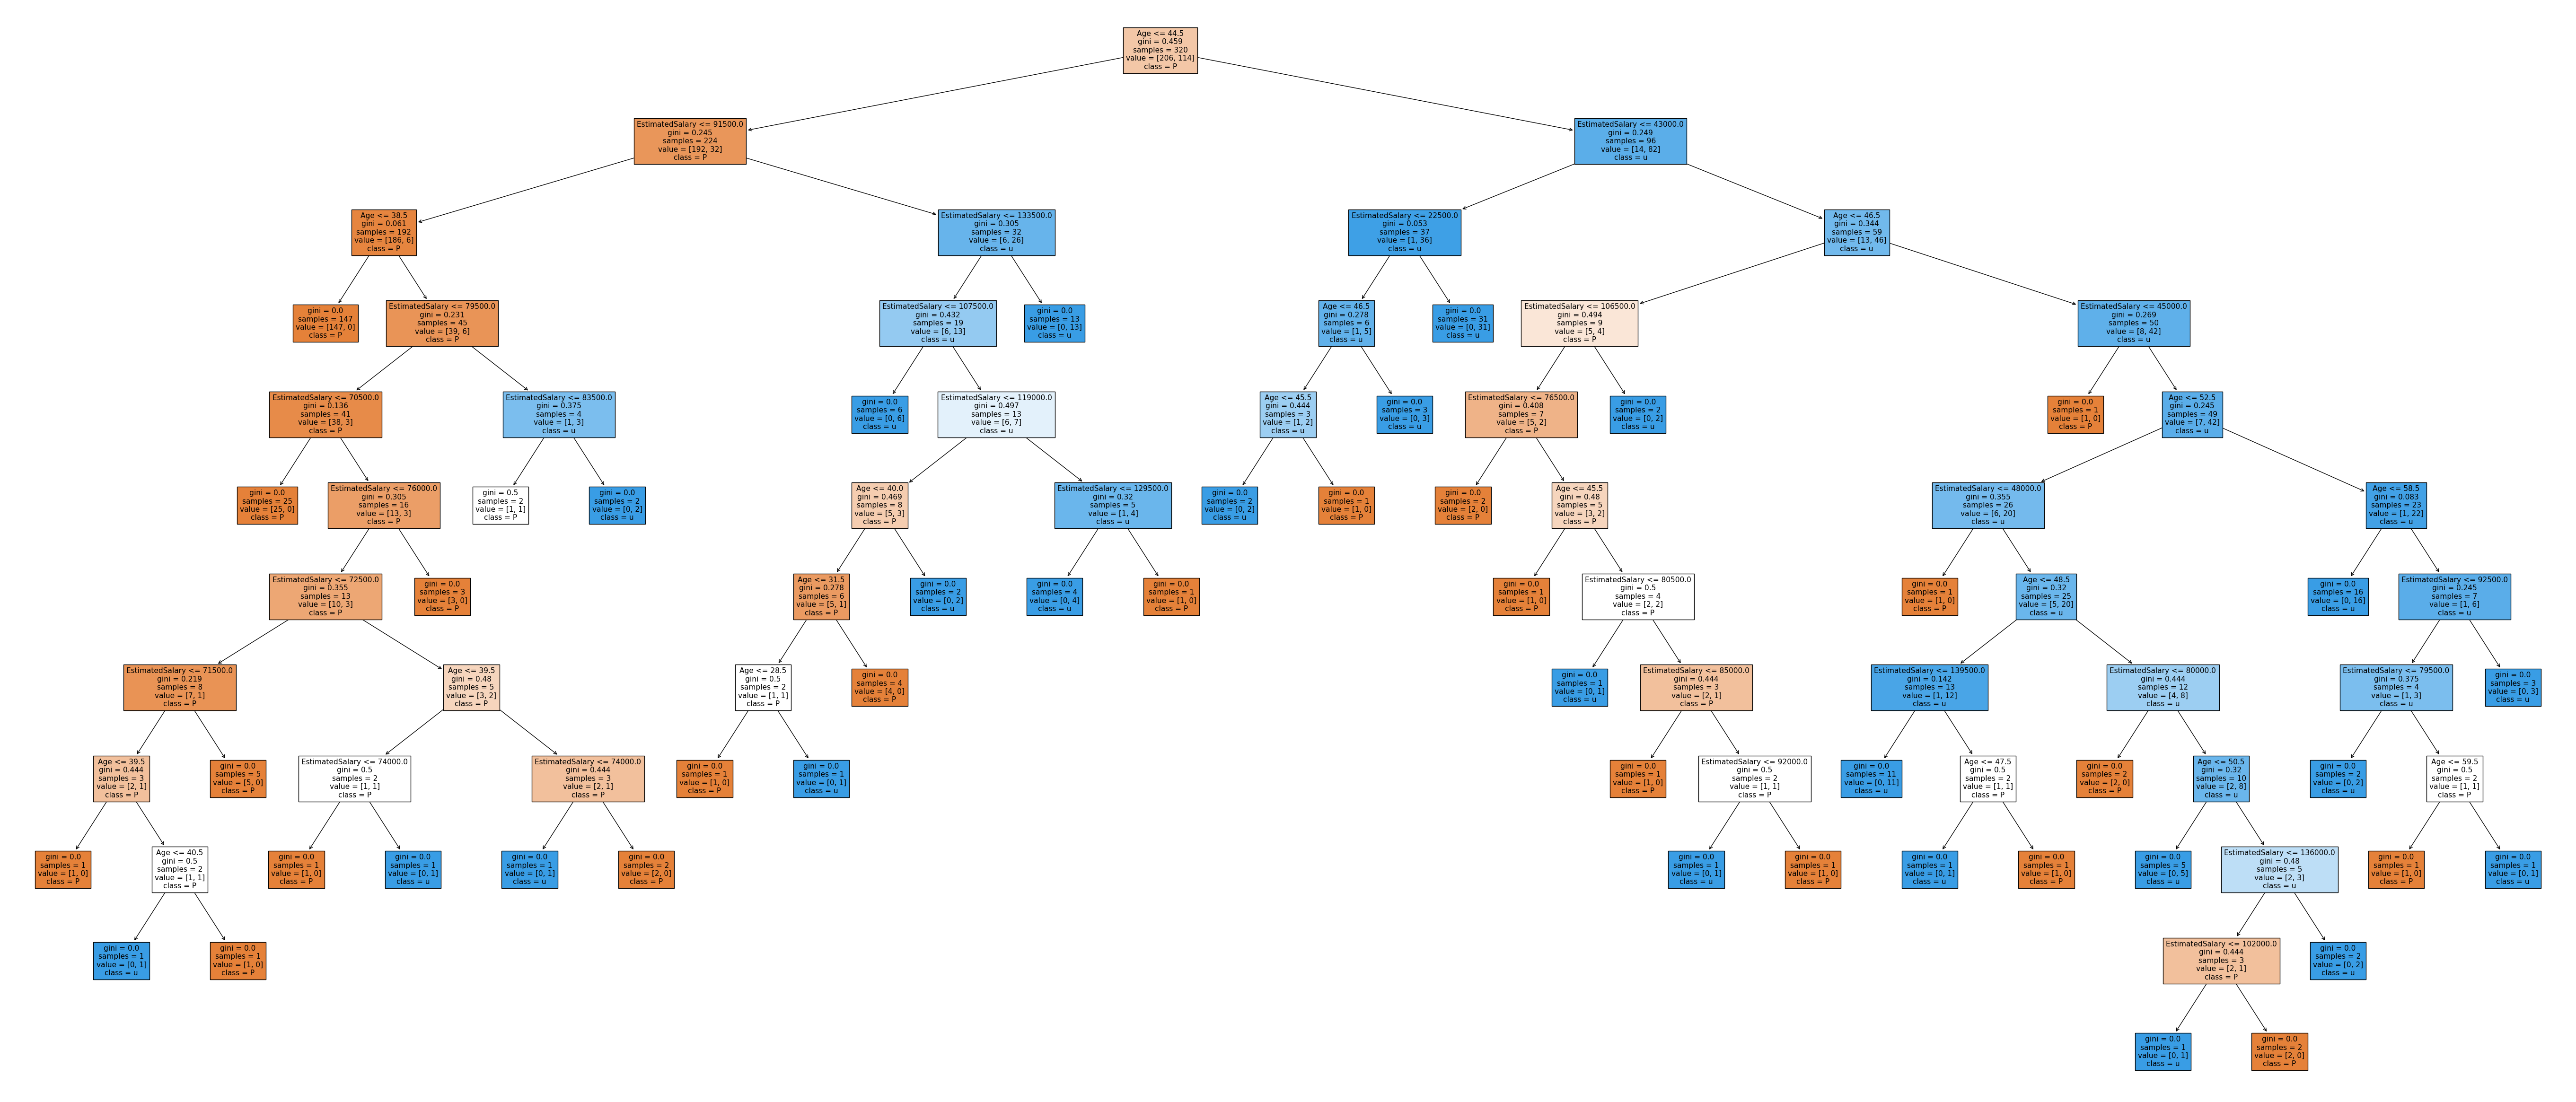

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(70,30))
_ =plot_tree(dtc,feature_names=['Age','EstimatedSalary'],class_names='Purchased',filled=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

82.5

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred_rf=rfc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rf)*100

82.5

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

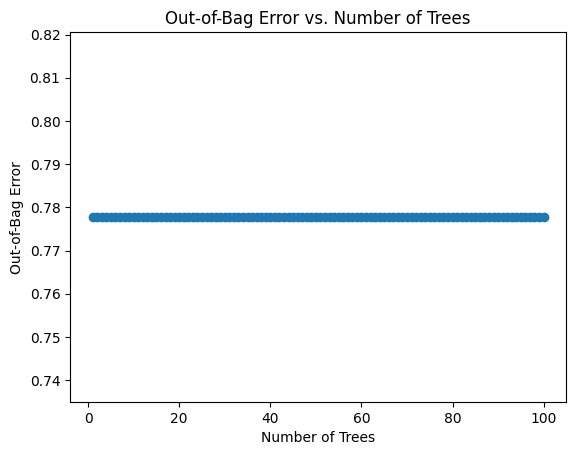

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Sample data
X = [[1], [2], [3], [4], [5], [7], [8], [9], [10]]
y = [23, 654, 13, 62, 52, 14, 14, 75, 99]

oob_error = []
for n_trees in range(1, 101):
    clf = RandomForestClassifier(n_estimators=n_trees, oob_score=True, random_state=42)
    clf.fit(X, y)
    oob_error.append(1 - clf.oob_score_)

plt.plot(range(1, 101), oob_error, marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Out-of-Bag Error")
plt.title("Out-of-Bag Error vs. Number of Trees")
plt.show()
